In [4]:
from typing import Tuple
import pandas as pd

def load_datasets(storage_folder) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    return [pd.read_pickle(storage_folder / f'{phase}_beatmaps.pkl') for phase in
            ['train', 'val', 'test']]

In [7]:
from pathlib import Path

storage_folder = Path('../../data/new_datasets')
train, val, test = load_datasets(storage_folder)

In [8]:
train.head(2)

l_lineLayer  l_lineIndex  l_cutDirection  \
name difficulty snippet time                                              
133b Expert     0       9.123            0            1               0   
                        9.577            0            1               1   

                               r_lineLayer  r_lineIndex  r_cutDirection  \
name difficulty snippet time                                              
133b Expert     0       9.123            0            2               1   
                        9.577            0            2               0   

                                    word   prev   next      part  \
name difficulty snippet time                                       
133b Expert     0       9.123  L010_R021  4.096  0.454  0.040046   
                        9.577  L011_R020  0.454  0.455  0.042039   

                                                                            mfcc  \
name difficulty snippet time                                                       
133b Expert     0       9.123  [-36.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....   
                        9.577  [-36.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....   

                               prev_l_lineLayer  prev_l_lineIndex  \
name difficulty snippet time                                        
133b Expert     0       9.123                 2                 0   
                        9.577                 0                 1   

                               prev_l_cutDirection  prev_r_lineLayer  \
name difficulty snippet time                                           
133b Expert     0       9.123                    0                 2   
                        9.577                    0                 0   

                               prev_r_lineIndex  prev_r_cutDirection  
name difficulty snippet time                                          
133b Expert     0       9.123                 3                    0  
                        9.577                 2                    1

### Zipf's law

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


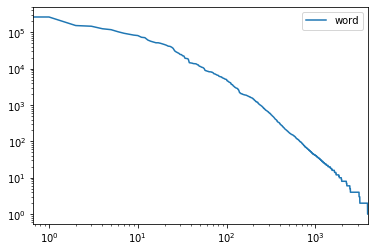

In [12]:
train.word.value_counts().reset_index().plot(loglog=True)

The word distribution is pretty much linear in loglog space. It follows Zipf's law for word distribution in a language.

In the `train` set, there are ~3500 unique words.

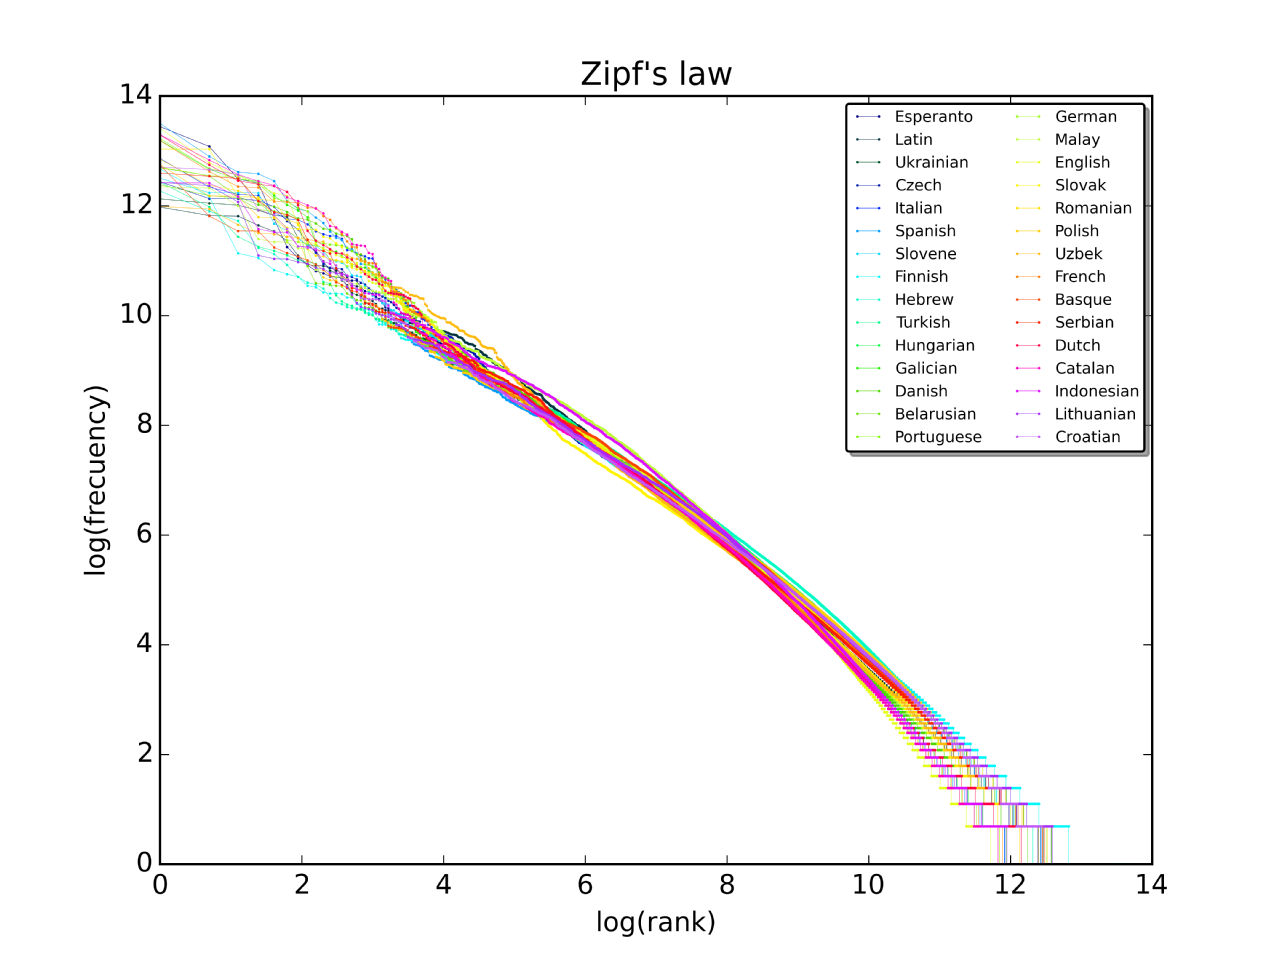 [Wiki]

### Multiple beat elements per beat

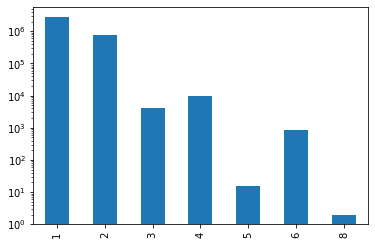

In [34]:
(train.word.str.len() // 5 + 1).value_counts().sort_index().plot.bar(logy=True)

Number of beat elements per beat also follows logarithmic distribution with dips at odd number of beat elements. This is because of the urge to have symetric moves if slicing more than one beat element per beat.

### Train, val, test overlap

In [39]:
len(set(val.word.unique()) - set(train.word.unique()))

146

In [40]:
len(set(test.word.unique()) - set(train.word.unique()))

100

### Generate sentences

In [110]:
def create_sentence(x):
    x.name = 'word'
    x = x.reset_index('time')
    x = x.drop_duplicates('time')
    x = x.word.str.cat(sep=' ')
    return x

text = train.droplevel(2).word.groupby(['name', 'difficulty']).apply(
    create_sentence).str.cat(sep='\n')

In [111]:
len(text), len(val.word.str.cat(sep=' ')) # should be ~half the size

(10758879, 2607894)

In [112]:
with open(storage_folder / 'train_text.cor', 'w') as wf:
    wf.write(text)